### Dataset Description

Our dataset is from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.

1. age       
2. sex       
3. chest pain type  (4 values)       
4. resting blood pressure  
5. serum cholestoral in mg/dl      
6. fasting blood sugar > 120 mg/dl       
7. resting electrocardiographic results  (values 0,1,2) 
8. maximum heart rate achieved  
9. exercise induced angina    
10. oldpeak = ST depression induced by exercise relative to rest   
11. the slope of the peak exercise ST segment     
12. number of major vessels (0-3) colored by flourosopy        
13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect     



### Attributes types


Real: 1,4,5,8,10,12

Ordered:11,

Binary: 2,6,9

Nominal:7,3,13


Data is provided courtesy of the Cleveland Heart Disease Database via the UCI Machine Learning repository.

Aha, D., and Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." University of California 3.1 (1988): 3-2.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import sklearn

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df

,age,sex,chestpain,bloodpressure,serum,bloodsugar,electrocardiographic,heartrate,angina,depression,slope,vessels,thal,disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   270 non-null    int64  
 1   sex                   270 non-null    int64  
 2   chestpain             270 non-null    int64  
 3   bloodpressure         270 non-null    int64  
 4   serum                 270 non-null    int64  
 5   bloodsugar            270 non-null    int64  
 6   electrocardiographic  270 non-null    int64  
 7   heartrate             270 non-null    int64  
 8   angina                270 non-null    int64  
 9   depression            270 non-null    float64
 10  slope                 270 non-null    int64  
 11  vessels               270 non-null    int64  
 12  thal                  270 non-null    int64  
 13  disease               270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [5]:
df.describe()

,age,sex,chestpain,bloodpressure,serum,bloodsugar,electrocardiographic,heartrate,angina,depression,slope,vessels,thal,disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [6]:
df.columns

Index(['age', 'sex', 'chestpain', 'bloodpressure', 'serum', 'bloodsugar',
       'electrocardiographic', 'heartrate', 'angina', 'depression', 'slope',
       'vessels', 'thal', 'disease'],
      dtype='object')

### Data Visualization

### Univariate Data Exploration

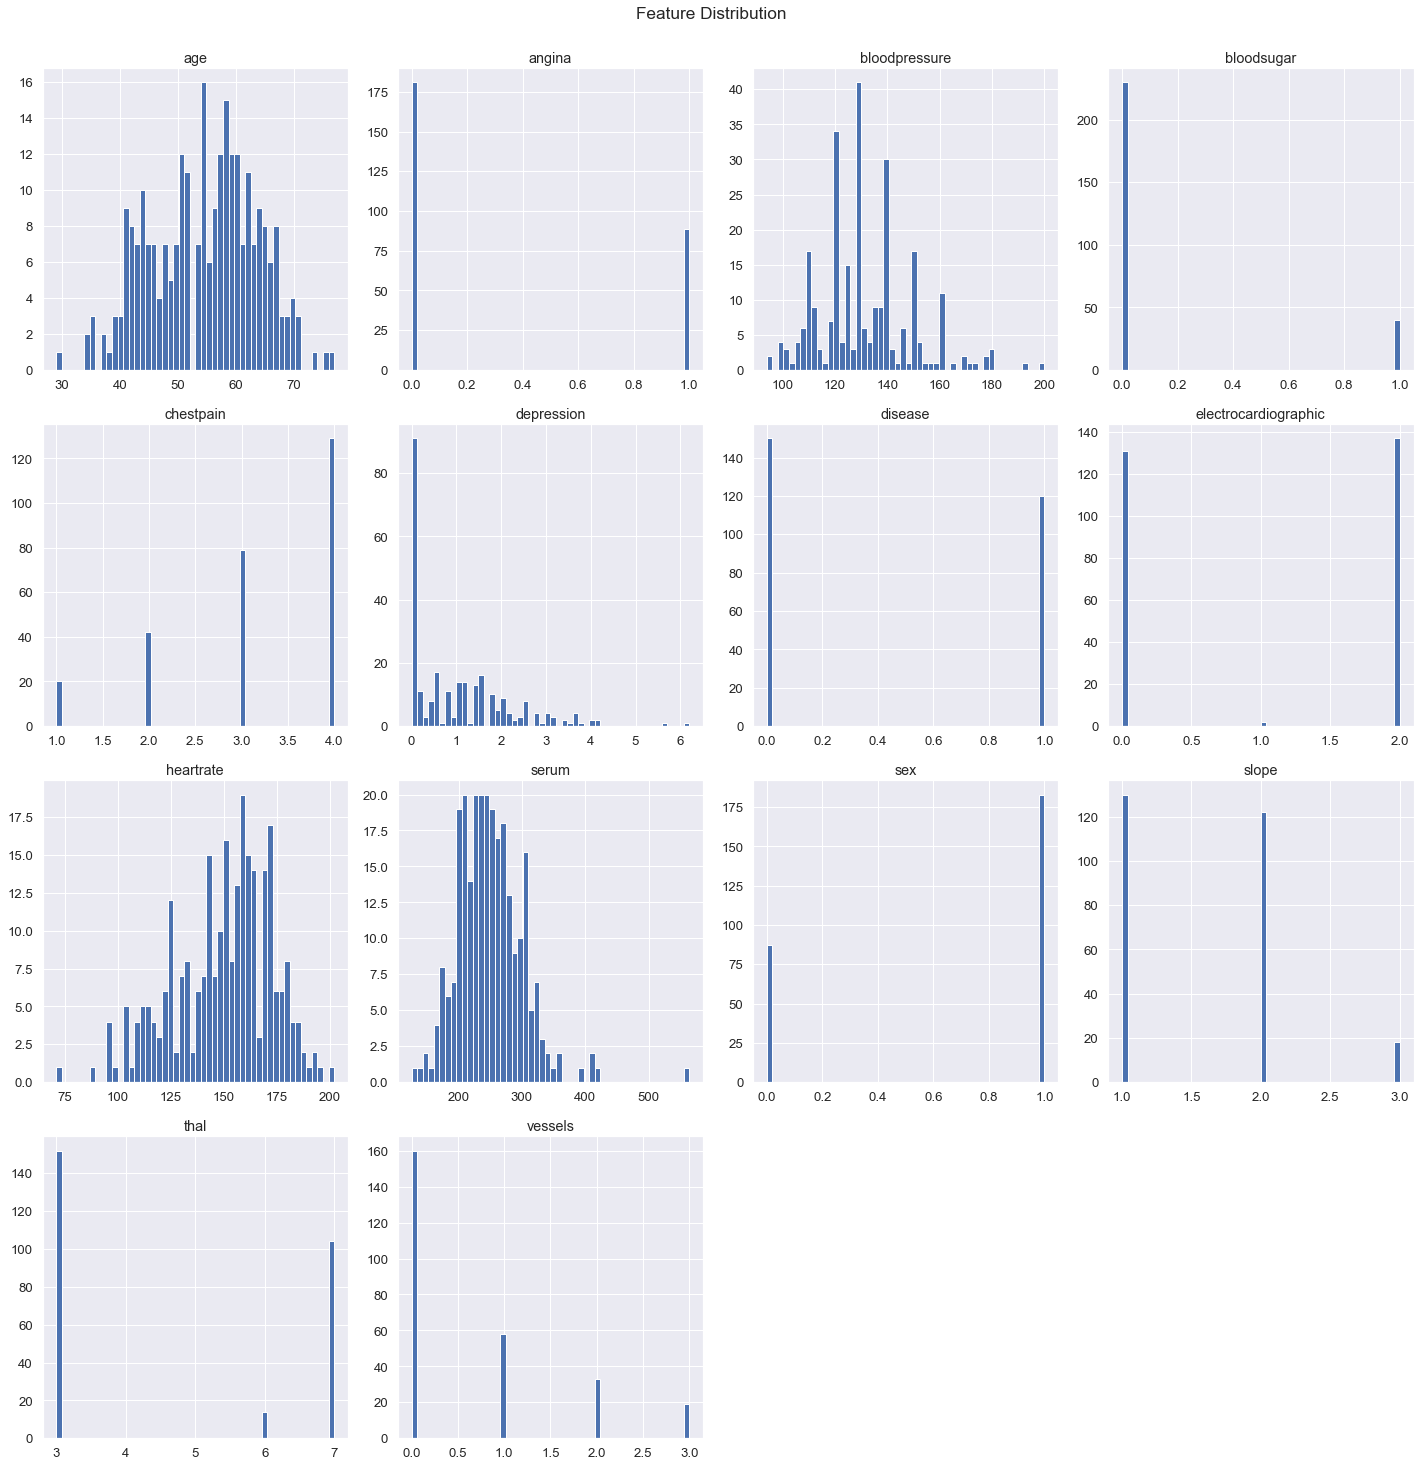

In [7]:
df.hist(bins=50, figsize=(20,20))

plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')

plt.tight_layout()

plt.show();

<Figure size 1440x1440 with 0 Axes>

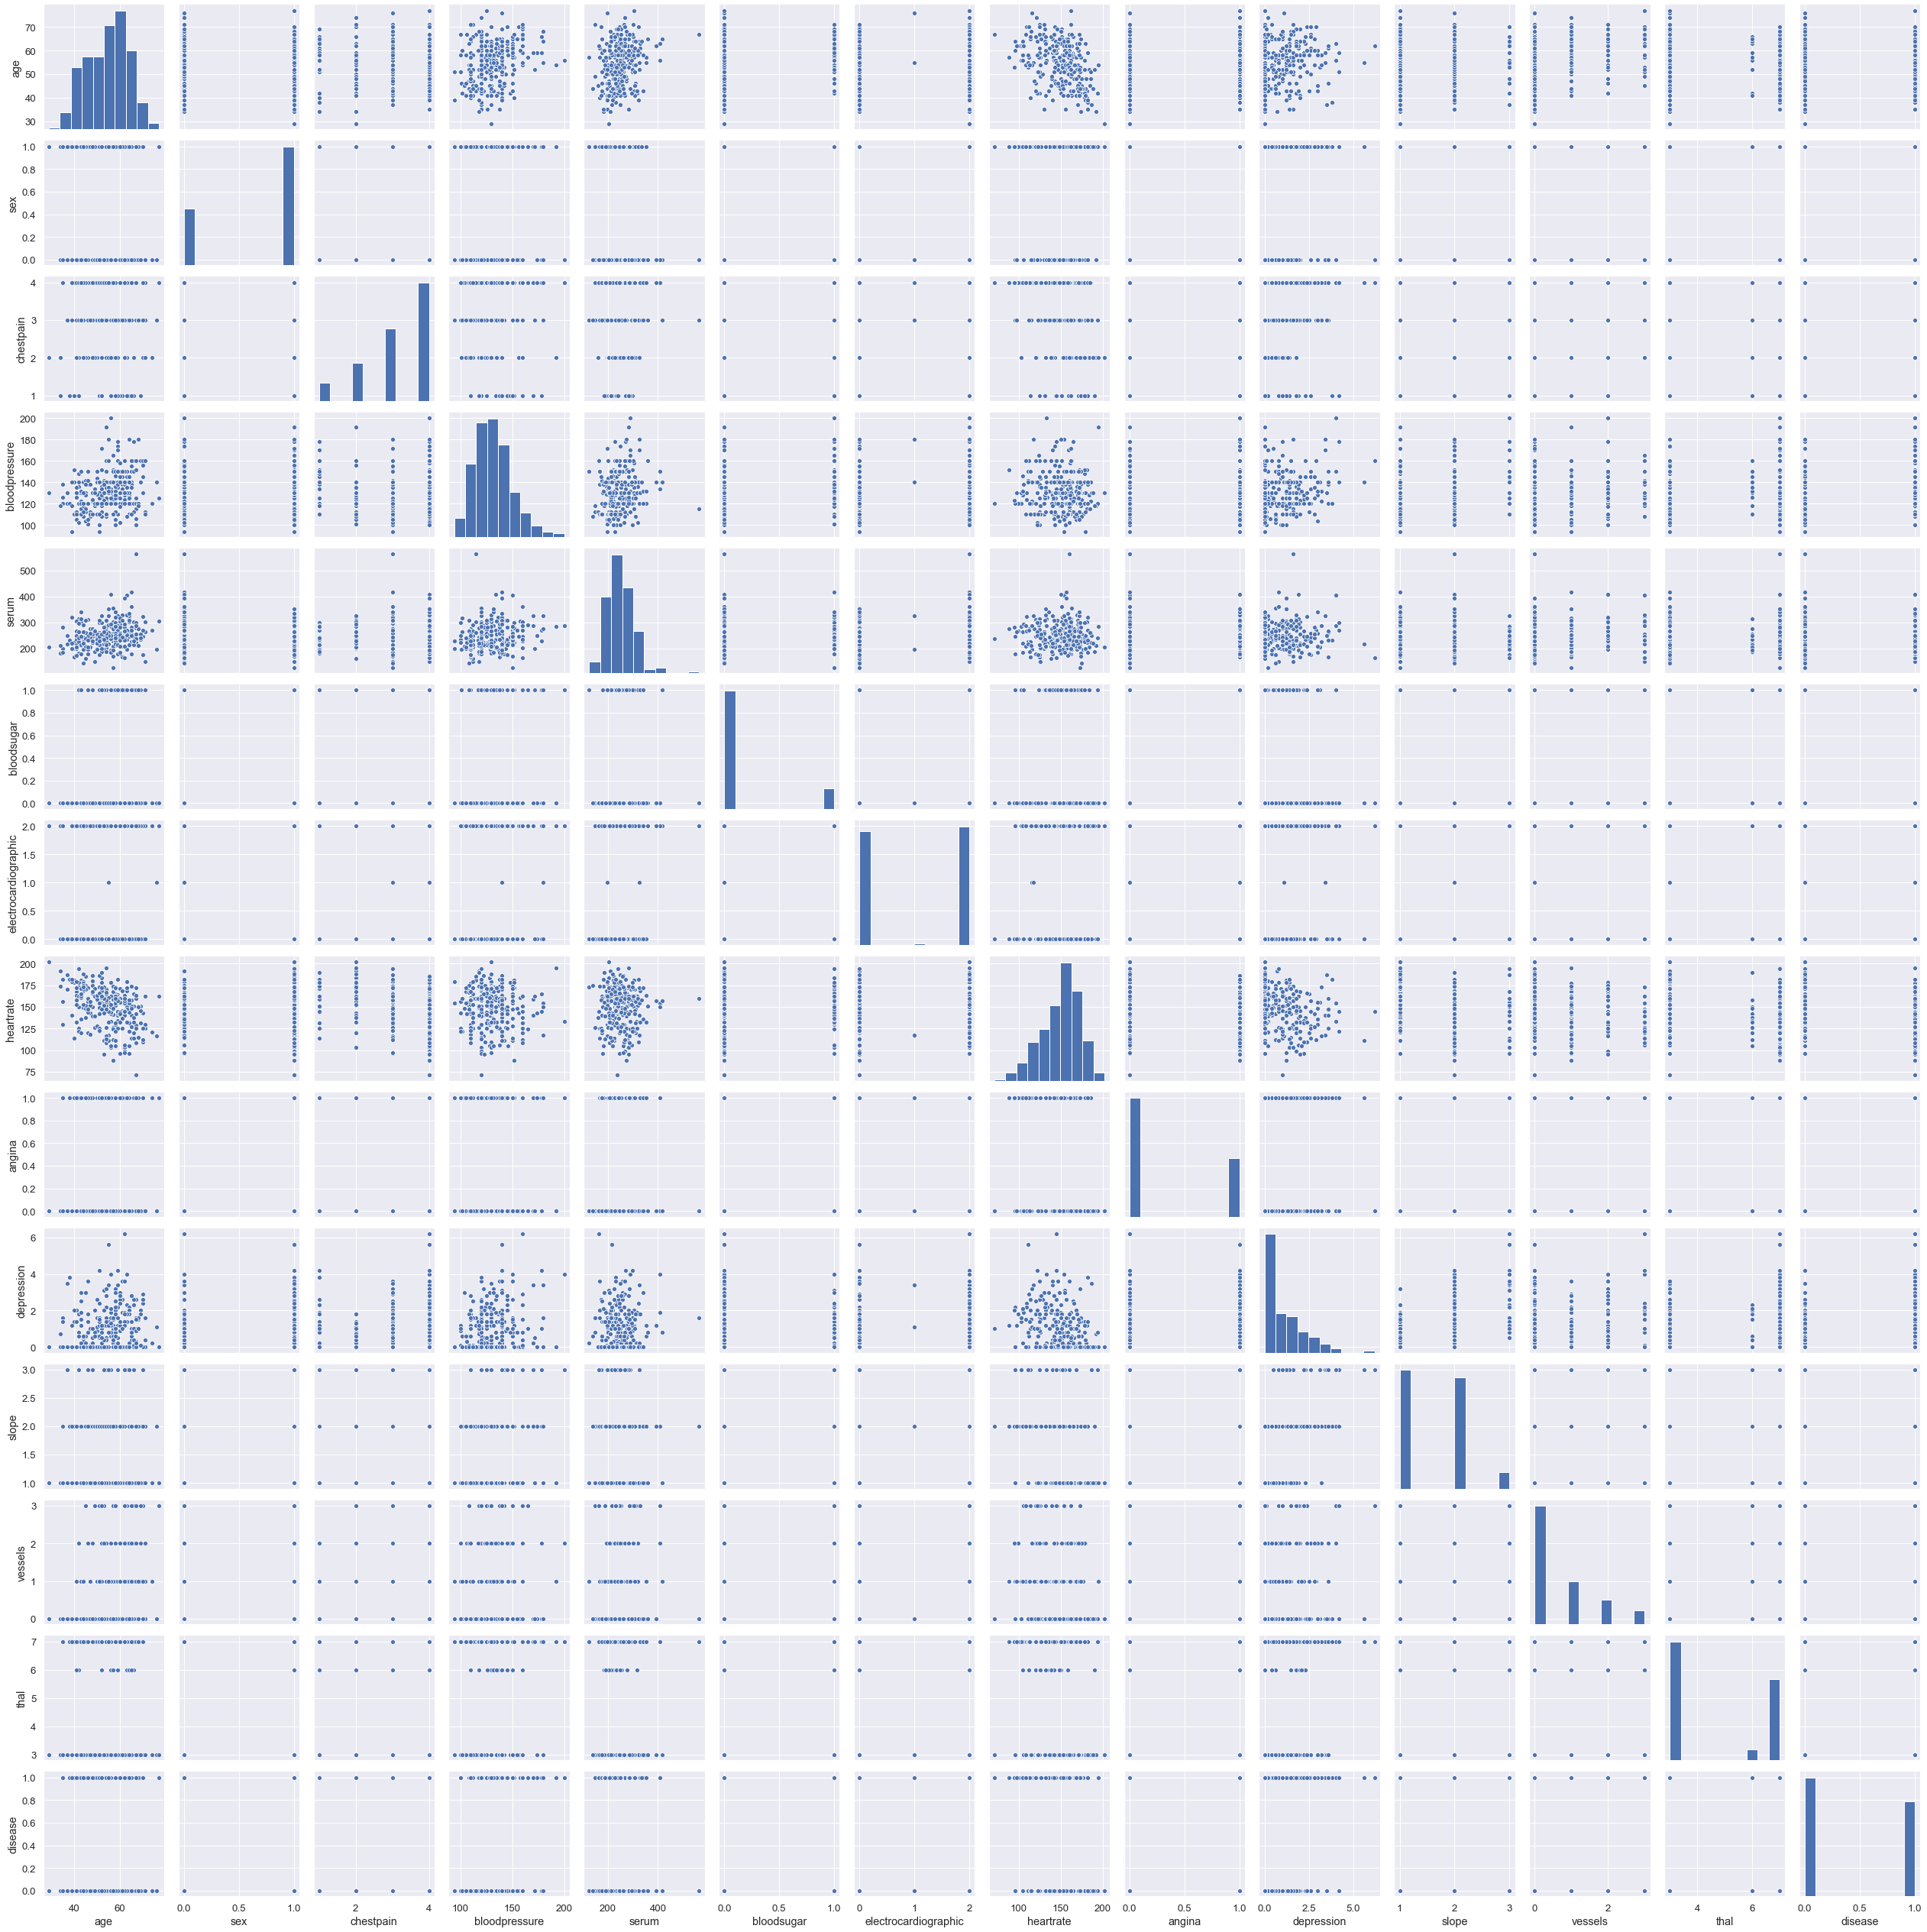

In [8]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(df)
plt.show()

### Correlation

In [9]:
df.corr()

,age,sex,chestpain,bloodpressure,serum,bloodsugar,electrocardiographic,heartrate,angina,depression,slope,vessels,thal,disease
age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
chestpain,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
bloodpressure,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
serum,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
bloodsugar,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
electrocardiographic,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
heartrate,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


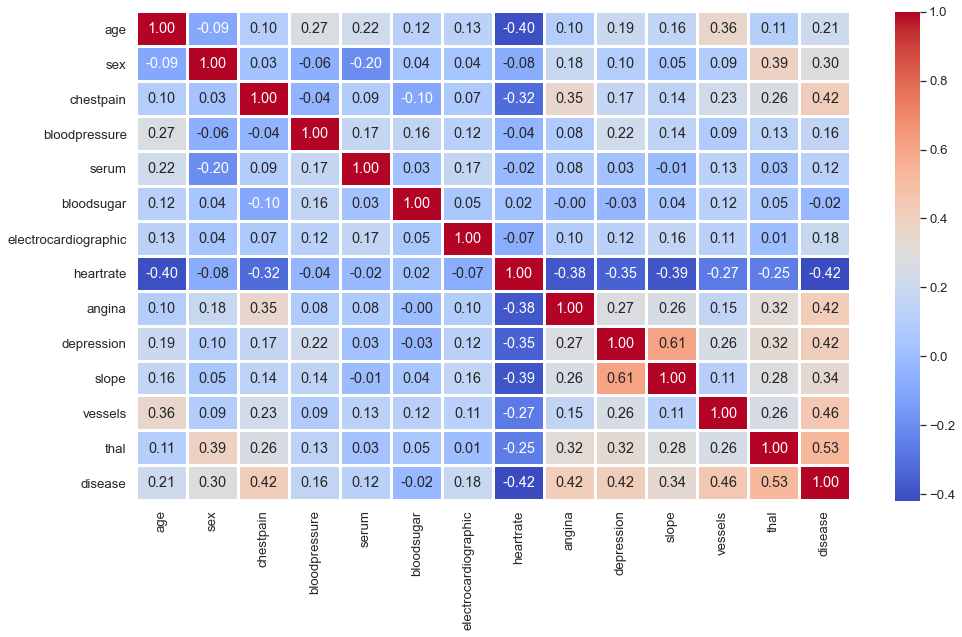

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Treat Data Types

In [11]:
df.head()

,age,sex,chestpain,bloodpressure,serum,bloodsugar,electrocardiographic,heartrate,angina,depression,slope,vessels,thal,disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [12]:
df.columns

Index(['age', 'sex', 'chestpain', 'bloodpressure', 'serum', 'bloodsugar',
       'electrocardiographic', 'heartrate', 'angina', 'depression', 'slope',
       'vessels', 'thal', 'disease'],
      dtype='object')

In [13]:
df[['sex','chestpain','bloodsugar','electrocardiographic','angina','slope',
       'thal']] = df[['sex','chestpain','bloodsugar','electrocardiographic','angina','slope',
       'thal']].astype("object")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   270 non-null    int64  
 1   sex                   270 non-null    object 
 2   chestpain             270 non-null    object 
 3   bloodpressure         270 non-null    int64  
 4   serum                 270 non-null    int64  
 5   bloodsugar            270 non-null    object 
 6   electrocardiographic  270 non-null    object 
 7   heartrate             270 non-null    int64  
 8   angina                270 non-null    object 
 9   depression            270 non-null    float64
 10  slope                 270 non-null    object 
 11  vessels               270 non-null    int64  
 12  thal                  270 non-null    object 
 13  disease               270 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 29.7+ KB


### Feature Scaling/Transform

In [15]:
df2 = pd.get_dummies(df,drop_first=True)

In [16]:
df2

,age,bloodpressure,serum,heartrate,depression,vessels,disease,sex_1,chestpain_2,chestpain_3,chestpain_4,bloodsugar_1,electrocardiographic_1,electrocardiographic_2,angina_1,slope_2,slope_3,thal_6,thal_7
0,70,130,322,109,2.4,3,1,1,0,0,1,0,0,1,0,1,0,0,0
1,67,115,564,160,1.6,0,0,0,0,1,0,0,0,1,0,1,0,0,1
2,57,124,261,141,0.3,0,1,1,1,0,0,0,0,0,0,0,0,0,1
3,64,128,263,105,0.2,1,0,1,0,0,1,0,0,0,1,1,0,0,1
4,74,120,269,121,0.2,1,0,0,1,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,172,199,162,0.5,0,0,1,0,1,0,1,0,0,0,0,0,0,1
266,44,120,263,173,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
267,56,140,294,153,1.3,0,0,0,1,0,0,0,0,1,0,1,0,0,0
268,57,140,192,148,0.4,0,0,1,0,0,1,0,0,0,0,1,0,1,0


In [17]:
df2.columns

Index(['age', 'bloodpressure', 'serum', 'heartrate', 'depression', 'vessels',
       'disease', 'sex_1', 'chestpain_2', 'chestpain_3', 'chestpain_4',
       'bloodsugar_1', 'electrocardiographic_1', 'electrocardiographic_2',
       'angina_1', 'slope_2', 'slope_3', 'thal_6', 'thal_7'],
      dtype='object')

In [18]:
df2 = df2[['age', 'bloodpressure', 'serum', 'heartrate', 'depression', 'vessels',
          'sex_1', 'chestpain_2', 'chestpain_3', 'chestpain_4',
          'bloodsugar_1', 'electrocardiographic_1', 'electrocardiographic_2',
          'angina_1', 'slope_2', 'slope_3', 'thal_6', 'thal_7', 'disease']]

In [19]:
df2

,age,bloodpressure,serum,heartrate,depression,vessels,sex_1,chestpain_2,chestpain_3,chestpain_4,bloodsugar_1,electrocardiographic_1,electrocardiographic_2,angina_1,slope_2,slope_3,thal_6,thal_7,disease
0,70,130,322,109,2.4,3,1,0,0,1,0,0,1,0,1,0,0,0,1
1,67,115,564,160,1.6,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,57,124,261,141,0.3,0,1,1,0,0,0,0,0,0,0,0,0,1,1
3,64,128,263,105,0.2,1,1,0,0,1,0,0,0,1,1,0,0,1,0
4,74,120,269,121,0.2,1,0,1,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,172,199,162,0.5,0,1,0,1,0,1,0,0,0,0,0,0,1,0
266,44,120,263,173,0.0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
267,56,140,294,153,1.3,0,0,1,0,0,0,0,1,0,1,0,0,0,0
268,57,140,192,148,0.4,0,1,0,0,1,0,0,0,0,1,0,1,0,0


### Create and save processed dataset

In [20]:
#df2.to_csv("heartrain.csv",index=False)

### Train Test Split

In [21]:
df = pd.read_csv("heartrain.csv")

In [22]:
df.shape

(270, 19)

In [23]:
df.columns

Index(['age', 'bloodpressure', 'serum', 'heartrate', 'depression', 'vessels',
       'sex_1', 'chestpain_2', 'chestpain_3', 'chestpain_4', 'bloodsugar_1',
       'electrocardiographic_1', 'electrocardiographic_2', 'angina_1',
       'slope_2', 'slope_3', 'thal_6', 'thal_7', 'disease'],
      dtype='object')

In [24]:
df = df[['age','serum', 'heartrate', 'depression', 'vessels',
       'sex_1', 'chestpain_2', 'chestpain_3', 'chestpain_4', 'bloodsugar_1',
       'electrocardiographic_1', 'electrocardiographic_2', 'angina_1',
       'slope_2', 'slope_3', 'thal_6', 'thal_7', 'disease','bloodpressure']]

In [25]:
df

,age,serum,heartrate,depression,vessels,sex_1,chestpain_2,chestpain_3,chestpain_4,bloodsugar_1,electrocardiographic_1,electrocardiographic_2,angina_1,slope_2,slope_3,thal_6,thal_7,disease,bloodpressure
0,70,322,109,2.4,3,1,0,0,1,0,0,1,0,1,0,0,0,1,130
1,67,564,160,1.6,0,0,0,1,0,0,0,1,0,1,0,0,1,0,115
2,57,261,141,0.3,0,1,1,0,0,0,0,0,0,0,0,0,1,1,124
3,64,263,105,0.2,1,1,0,0,1,0,0,0,1,1,0,0,1,0,128
4,74,269,121,0.2,1,0,1,0,0,0,0,1,1,0,0,0,0,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,199,162,0.5,0,1,0,1,0,1,0,0,0,0,0,0,1,0,172
266,44,263,173,0.0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,120
267,56,294,153,1.3,0,0,1,0,0,0,0,1,0,1,0,0,0,0,140
268,57,192,148,0.4,0,1,0,0,1,0,0,0,0,1,0,1,0,0,140


In [26]:
X = df.iloc[:,0:18]
y = df.iloc[:,18]

In [27]:
X.values, y.values

(array([[ 70., 322., 109., ...,   0.,   0.,   1.],
        [ 67., 564., 160., ...,   0.,   1.,   0.],
        [ 57., 261., 141., ...,   0.,   1.,   1.],
        ...,
        [ 56., 294., 153., ...,   0.,   0.,   0.],
        [ 57., 192., 148., ...,   1.,   0.,   0.],
        [ 67., 286., 108., ...,   0.,   0.,   1.]]),
 array([130, 115, 124, 128, 120, 120, 130, 110, 140, 150, 135, 142, 140,
        134, 128, 112, 140, 140, 110, 140, 120, 130, 115, 112, 132, 130,
        138, 120, 112, 110, 128, 160, 120, 170, 144, 130, 140, 160, 130,
        122, 152, 124, 130, 101, 126, 140, 118, 110, 160, 150, 136, 128,
        140, 140, 130, 105, 138, 120, 174, 120, 150, 130, 120, 150, 145,
        150, 140, 136, 118, 108, 120, 120, 156, 140, 106, 142, 104,  94,
        120, 120, 146, 120, 150, 130, 110, 148, 128, 178, 126, 150, 140,
        130, 124, 110, 125, 110, 120, 100, 140, 120, 108, 120, 130, 165,
        130, 124, 100, 150, 140, 112, 180, 110, 158, 135, 120, 134, 120,
        200, 150, 130,

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 18), (54, 18), (216,), (54,))

### Feature Scaling

In [30]:
X_train

,age,serum,heartrate,depression,vessels,sex_1,chestpain_2,chestpain_3,chestpain_4,bloodsugar_1,electrocardiographic_1,electrocardiographic_2,angina_1,slope_2,slope_3,thal_6,thal_7,disease
5,65,177,140,0.4,0,1,0,0,1,0,0,0,0,0,0,0,1,0
22,43,303,181,1.2,0,1,0,0,1,0,0,0,0,1,0,0,0,0
196,58,248,122,1.0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
110,55,327,117,3.4,0,0,0,0,1,0,1,0,1,1,0,0,0,1
12,44,235,180,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,44,219,188,0.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
192,54,309,156,0.0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
117,56,288,133,4.0,2,0,0,0,1,1,0,1,1,0,1,0,1,1
47,44,197,177,0.0,1,1,0,0,1,0,0,1,0,0,0,0,0,1


In [31]:
minmax = MinMaxScaler()

In [32]:
X_train_scaled = minmax.fit_transform(X_train)

In [33]:
X_test_scaled = minmax.transform(X_test)

In [34]:
X_train_scaled

array([[0.76595745, 0.11643836, 0.45614035, ..., 0.        , 1.        ,
        0.        ],
       [0.29787234, 0.40410959, 0.81578947, ..., 0.        , 0.        ,
        0.        ],
       [0.61702128, 0.27853881, 0.29824561, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.57446809, 0.36986301, 0.39473684, ..., 0.        , 1.        ,
        1.        ],
       [0.31914894, 0.16210046, 0.78070175, ..., 0.        , 0.        ,
        1.        ],
       [0.80851064, 0.39497717, 0.3245614 , ..., 0.        , 0.        ,
        1.        ]])

In [35]:
X_test_scaled

array([[ 0.72340426,  0.24429224,  0.54385965,  0.37096774,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ],
       [ 0.36170213,  0.11643836,  0.63157895,  0.22580645,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.74468085,  0.40410959,  0.29824561,  0.32258065,  0.66666667,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.87234043,  0.32648402,  0.21052632,  0.46774194,  0.33333333,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  1.   

### Section 1 : Regression (Predict Blood Pressure)

In [36]:
lr = LinearRegression()

In [37]:
model = lr.fit(X_train_scaled,y_train)

In [38]:
y_pred = model.predict(X_test_scaled)

In [39]:
y_pred[:10]

array([162.48588562, 136.12316588, 133.4370176 , 132.48577756,
       119.31611785, 145.88854269, 135.07170234, 138.83091643,
       125.09789119, 131.10441131])

In [40]:
y_test[:10]

64     145
135    142
153    130
189    160
253    110
198    140
144    192
180    120
256    150
15     112
Name: bloodpressure, dtype: int64

### Model Evaluation

In [41]:
mse = mean_squared_error(y_test,y_pred)
mse

355.08887178634967

In [42]:
rmse = np.sqrt(mse)
rmse

18.843801946166533

In [43]:
r2score = r2_score(y_test,y_pred)
r2score

0.12561622123336702

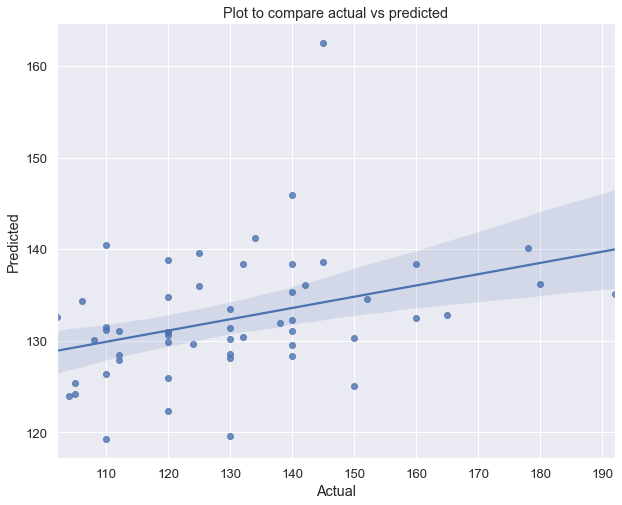

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Cross-Validation

In [45]:
cv = cross_val_score(lr,X,y,cv=5,verbose=1,scoring='r2')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [46]:
cv.mean()

-0.002751760815410864

### Section 2: Classification (Predict Heart Disease)

In [47]:
df = pd.read_csv("heartrain.csv")

In [48]:
df

,age,bloodpressure,serum,heartrate,depression,vessels,sex_1,chestpain_2,chestpain_3,chestpain_4,bloodsugar_1,electrocardiographic_1,electrocardiographic_2,angina_1,slope_2,slope_3,thal_6,thal_7,disease
0,70,130,322,109,2.4,3,1,0,0,1,0,0,1,0,1,0,0,0,1
1,67,115,564,160,1.6,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,57,124,261,141,0.3,0,1,1,0,0,0,0,0,0,0,0,0,1,1
3,64,128,263,105,0.2,1,1,0,0,1,0,0,0,1,1,0,0,1,0
4,74,120,269,121,0.2,1,0,1,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,172,199,162,0.5,0,1,0,1,0,1,0,0,0,0,0,0,1,0
266,44,120,263,173,0.0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
267,56,140,294,153,1.3,0,0,1,0,0,0,0,1,0,1,0,0,0,0
268,57,140,192,148,0.4,0,1,0,0,1,0,0,0,0,1,0,1,0,0


In [49]:
X = df.iloc[:,0:18]
y = df.iloc[:,18]

In [50]:
X.values, y.values

(array([[ 70., 130., 322., ...,   0.,   0.,   0.],
        [ 67., 115., 564., ...,   0.,   0.,   1.],
        [ 57., 124., 261., ...,   0.,   0.,   1.],
        ...,
        [ 56., 140., 294., ...,   0.,   0.,   0.],
        [ 57., 140., 192., ...,   0.,   1.,   0.],
        [ 67., 160., 286., ...,   0.,   0.,   0.]]),
 array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
        0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 1,

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 18), (54, 18), (216,), (54,))

### Feature Scaling

In [53]:
X_train

,age,bloodpressure,serum,heartrate,depression,vessels,sex_1,chestpain_2,chestpain_3,chestpain_4,bloodsugar_1,electrocardiographic_1,electrocardiographic_2,angina_1,slope_2,slope_3,thal_6,thal_7
222,57,150,168,174,1.6,0,1,0,1,0,0,0,0,0,0,0,0,0
10,59,135,234,161,0.5,0,1,0,0,1,0,0,0,0,1,0,0,1
131,66,112,212,132,0.1,1,1,0,0,1,0,0,1,1,0,0,0,0
176,51,140,298,122,4.2,3,1,0,0,1,0,0,0,1,1,0,0,1
180,42,120,240,194,0.8,0,1,0,1,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,69,140,254,146,2.0,3,1,0,1,0,0,0,1,0,1,0,0,1
11,53,142,226,111,0.0,0,1,0,0,1,0,0,1,1,0,0,0,1
23,47,112,204,143,0.1,0,1,0,0,1,0,0,0,0,0,0,0,0
60,57,150,126,173,0.2,1,1,0,1,0,1,0,0,0,0,0,0,1


In [54]:
minmax = MinMaxScaler()

In [55]:
X_train_scaled = minmax.fit_transform(X_train)

In [56]:
X_test_scaled = minmax.transform(X_test)

In [57]:
X_train_scaled

array([[0.58333333, 0.57142857, 0.09589041, ..., 0.        , 0.        ,
        0.        ],
       [0.625     , 0.41836735, 0.24657534, ..., 0.        , 0.        ,
        1.        ],
       [0.77083333, 0.18367347, 0.19634703, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.375     , 0.18367347, 0.17808219, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.57142857, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.70833333, 0.41836735, 0.28767123, ..., 0.        , 0.        ,
        0.        ]])

In [58]:
X_test_scaled

array([[0.1875    , 0.26530612, 0.23972603, 0.84732824, 0.61290323,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 1.        ],
       [0.47916667, 0.40816327, 0.17123288, 0.66412214, 0.12903226,
        0.33333333, 1.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.29166667, 0.28571429, 0.19863014, 0.71755725, 0.03225806,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        ],
       [0.79166667, 0.06122449, 0.39497717, 0.41221374, 0.14516129,
        0.66666667, 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 1.        ,
        0.        , 0.        , 0.        ],
    

In [59]:
logic = LogisticRegression(random_state=0)

In [60]:
model2 = logic.fit(X_train_scaled,y_train)

In [61]:
y_pred2 = model2.predict(X_test_scaled)

#### You can do comparison with test data actual value with predicted data

In [62]:
y_pred2[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [63]:
y_test[:10]

160    1
128    0
212    0
172    1
218    0
85     0
263    0
254    0
183    0
133    1
Name: disease, dtype: int64

### Cross-Validation

In [64]:
cv = cross_val_score(model2,X,y,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [65]:
cv.mean()

0.8555555555555555

### Model Evaluation

In [66]:
cm = confusion_matrix(y_test,y_pred2)
cm

array([[26,  4],
       [ 6, 18]], dtype=int64)

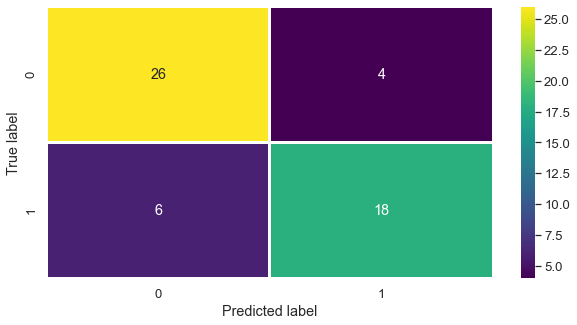

In [67]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [68]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        30
           1       0.82      0.75      0.78        24

    accuracy                           0.81        54
   macro avg       0.82      0.81      0.81        54
weighted avg       0.82      0.81      0.81        54



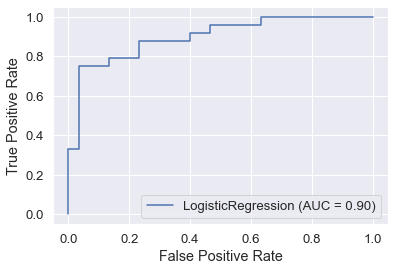

In [69]:
plot_roc_curve(model2,X_test_scaled,y_test)
plt.show()